## Solve ${\partial^2 u \over \partial x^2}+{\partial^2 u \over \partial y^2}=4\pi G \rho$

\begin{eqnarray}
{\partial^2 u \over \partial x^2}={u_{i+1,j}-2u_{i,j}+u_{i-1,j} \over \Delta x^2}
\end{eqnarray}

\begin{eqnarray}
{\partial^2 u \over \partial y^2}={u_{i,j+1}-2u_{i,j}+u_{i,j-1} \over \Delta y^2}
\end{eqnarray}

Set $\Delta x= \Delta y = h$
\begin{eqnarray}
{\partial^2 u \over \partial x^2} + {\partial^2 u \over \partial y^2}={1 \over h^2}(u_{i+1,j}+u_{i-1,j}+u_{i,j+1}+u_{i,j-1}-4u_{i,j})=4\pi G\rho
\end{eqnarray}
where $G=1$ is adopted. and 

\begin{eqnarray}
\rho=\{
\begin{array} \\
1 & x=50, y=50 \\
0 & else
\end{array}
\end{eqnarray}

Thus,
\begin{eqnarray}
u_{i,j}={1 \over 4}[(u_{i+1,j}+u_{i-1,j}+u_{i,j+1}+u_{i,j-1})-4\pi G\rho h^2] 
\end{eqnarray}
and
\begin{eqnarray}
du_{i,j}={1 \over 4}[(u_{i+1,j}+u_{i-1,j}+u_{i,j+1}+u_{i,j-1})-4\pi G\rho h^2]-u_{i,j}
\end{eqnarray}

Using SOR method, we have
\begin{eqnarray}
u_{i,j}^*=u_{i,j}+\Omega du
\end{eqnarray}

0
3.141592653589793
1.413716694115407
1.2723450247038663
0.8588328916751098
0.7729496025075988
0.579712201880699
0.5217409816926292
0.4108710230829455
0.36978392077465094
0.2995249758274673
10
0.2695724782447206
0.22239729455189447
0.20015756509670501
0.1672745365451035
0.15054708289059315
0.12702410118893798
0.11432169107004418
0.09717343740953756
0.0874560936685838
0.07477496008663914
20
0.06729746407797522
0.05781463959426054
0.052033175634834485
0.044878613985044745
0.04039075258654027
0.03495353589219831
0.03145818230297848
0.027301208212942036
0.024571087391647834
0.021376846030733615
30
0.0200685924525843
0.01925868117950058
0.018656941545204253
0.01796494382314706
0.017444404750322162
0.016843876954285353
0.016388410872057113
0.015870160542546863
0.015458397844652527
0.015005738080432707
40
0.014631748662373045
0.014233814952343327
0.013891277259362234
0.013538253170005454
0.01322362241687225
0.012907131305265995
0.012618190594924972
0.012332067938648716
0.012066440328279082
0.

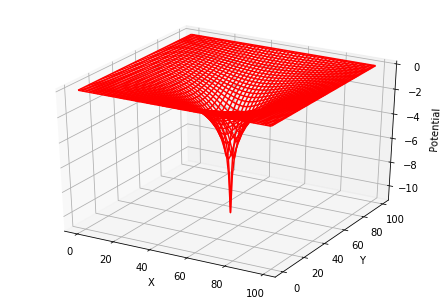

In [49]:
import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;
import numpy;
omega=1.8
Nmax = 100; Niter = 3000; V = zeros((Nmax, Nmax), float); rho = zeros((Nmax, Nmax), float)

rho[50,50]=1 
for iter in range(Niter):                                  
    if iter%10 == 0: print(iter)
    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): 
            du = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1]-4*pi*rho[i,j])-V[i,j]
            if(maxerr<abs(du)):
                maxerr=abs(du)
            V[i,j]=V[i,j] + omega*du  
    print(maxerr)
    if(maxerr<1.e-3):
        break
            
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

def functz(V):                                         # V(x, y) 
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show() 

Since the system is axisymmetric, we fix y as y=50 and change x. 
\begin{eqnarray}
r=|x-50|
\end{eqnarray}

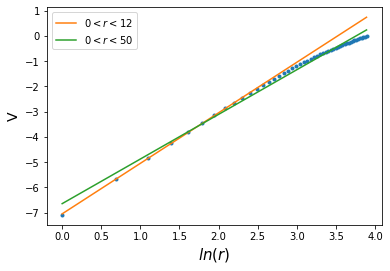

[ 2.00033955 -7.04429138] [ 1.76751544 -6.6406164 ]


In [48]:
r=[]
Vr=[]
for i in range(51,len(x)):
    r.append(x[i]-50)
    Vr.append(V[i,50])
p.plot(log(r),Vr,'.')
result1 = polyfit(log(r)[0:13],Vr[0:13], 1)
result2 = polyfit(log(r),Vr, 1)
p.plot(log(r),log(r)*result1[0]+result1[1],label='$0<r<12$')
p.plot(log(r),log(r)*result2[0]+result2[1],label='$0<r<50$')
p.xlabel(r'$ln(r)$',fontsize=15)
p.ylabel('V',fontsize=14)
p.legend()
p.show()
print(result1,result2)

In the figure above, the dots represent the values obtained by solving Poisson equation. The solid lines represent the best fitting results using the form $V\sim ln(r)$. As we can see, the slope of curves become smaller as the increase of $r$.  

We have $2G\mu=2$ in this problem. Hence, only in the field near the line mass, the relation between $V$ and $r$ is close to $V=2G\mu\times ln(r)+constant$.